# Goal

- Predict file format


In [1]:
import pandas as pd
import numpy as np
import toolbox # my own little package I made to help with curation work

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/cleaned-data-20231031.csv", low_memory=False)
df = df.loc[
    :,
    [
        "id",
        "type",
        "PORTAL",
        "name",
        "fileFormat",
        "study",
        "assay",
        "dataType",
        # "dataSubtype",
        # "resourceType",
    ],
]

df = df[df["type"] != "folder"]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551522 entries, 0 to 583176
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          551522 non-null  object
 1   type        551187 non-null  object
 2   PORTAL      551522 non-null  object
 3   name        551522 non-null  object
 4   fileFormat  539149 non-null  object
 5   study       511430 non-null  object
 6   assay       370700 non-null  object
 7   dataType    332736 non-null  object
dtypes: object(8)
memory usage: 37.9+ MB


In [3]:
df_full = df.dropna(how="any")
df_full = df_full[
    df_full["assay"].fillna("").str.split(",").apply(lambda x: len(x)) == 1
]  # keeping only one assay per file for now
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328169 entries, 0 to 582765
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          328169 non-null  object
 1   type        328169 non-null  object
 2   PORTAL      328169 non-null  object
 3   name        328169 non-null  object
 4   fileFormat  328169 non-null  object
 5   study       328169 non-null  object
 6   assay       328169 non-null  object
 7   dataType    328169 non-null  object
dtypes: object(8)
memory usage: 22.5+ MB


In [4]:
df_full

,id,type,PORTAL,name,fileFormat,study,assay,dataType
0,syn27021908,file,ad,R3928849-DLPFC.final.cram.crai,crai,AMP-AD_DiverseCohorts,whole genome sequencing assay,genomicVariants
1,syn27021914,file,ad,R5143011-DLPFC.final.cram.crai,crai,AMP-AD_DiverseCohorts,whole genome sequencing assay,genomicVariants
2,syn27021919,file,ad,R9609047-DLPFC.final.cram.crai,crai,AMP-AD_DiverseCohorts,whole genome sequencing assay,genomicVariants
3,syn27021925,file,ad,R9693165-DLPFC.final.cram.crai,crai,AMP-AD_DiverseCohorts,whole genome sequencing assay,genomicVariants
4,syn27021929,file,ad,R5422277-DLPFC.final.cram.crai,crai,AMP-AD_DiverseCohorts,whole genome sequencing assay,genomicVariants
...,...,...,...,...,...,...,...,...
582749,syn26347224,file,psychencode,mi2015_896_r_S3_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression
582750,syn26347226,file,psychencode,mi2015_1453_r_S17_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression
582751,syn26347228,file,psychencode,mi2015_918_S14_R1_001.fastq.gz,gz,BrainGVEX,miRNA-seq assay,geneExpression
582759,syn26453724,file,psychencode,SL424495_GSLv5-8_i7_45.merge.fastq.gz,gz,BrainTF,ChIP-seq assay,chromatinActivity


In [5]:
assays = list(df_full["assay"].value_counts()[:20].reset_index()["index"])
assays

['RNA-seq assay',
 'whole genome sequencing assay',
 'methylation array',
 'ChIP-seq assay',
 'whole exome sequencing assay',
 'TMT quantitation assay',
 'single-cell RNA sequencing assay',
 'single-nucleus RNA sequencing assay',
 'ATAC-seq assay',
 'active avoidance learning behavior assay',
 'snpArray',
 'RNA array',
 'cell viability assay',
 'conventional MRI',
 'single-cell whole genome sequencing assay',
 'immunohistochemistry',
 'immunofluorescence',
 'western blot assay',
 'single-nucleus ATAC-seq assay',
 '3D microtissue viability']

In [6]:
df_full["study"].value_counts()[:20]

Capstone Collection                                                                                40495
ROSMAP                                                                                             33341
WGS_Harmonization                                                                                  29422
AD_CrossSpecies                                                                                    20628
AMP-AD_DiverseCohorts                                                                              19208
MIT_ROSMAP_Multiomics                                                                              13578
The Johns Hopkins NF1 biospecimen repository                                                       12438
rnaSeqReprocessing                                                                                 12334
SV_xQTL                                                                                            10569
LBP                                                    

In [7]:
fileformats = list(df_full["fileFormat"].value_counts()[
                   :20].reset_index()['index'])

In [8]:
temp = df_full.groupby(
    ['assay', 'fileFormat'])['name'].count().reset_index().rename(columns={'name': 'count'})

In [9]:
temp['countLog'] =  np.log10(temp['count'])

In [59]:
temp2 = df_full.groupby(
    ['fileFormat'])['name'].count().reset_index().rename(columns={'name': 'count'})

temp2['proportion'] = temp2['count'] / temp2['count'].sum()*100

temp2

,fileFormat,count,proportion
0,7z,2,0.000609
1,BAI,7214,2.198258
2,BAM,33143,10.099370
3,BED,619,0.188622
4,BMP,36,0.010970
...,...,...,...
132,unr,1,0.000305
133,var,5,0.001524
134,xlsb,4,0.001219
135,xlsx,653,0.198983


In [60]:
print(temp2[temp2['proportion'] > 10].to_markdown())

|    | fileFormat   |   count |   proportion |
|---:|:-------------|--------:|-------------:|
|  2 | BAM          |   33143 |      10.0994 |
| 75 | gz           |  133007 |      40.53   |


In [64]:
temp3 = df_full.groupby(
    ['assay'])['name'].count().reset_index().rename(columns={'name': 'count'})
temp3['proportion'] = round(temp3['count'] / temp3['count'].sum()*100,3)

temp3[temp3['proportion'] > 5].sort_values(by='proportion', ascending = False)

,assay,count,proportion
35,RNA-seq assay,142883,43.539
138,whole genome sequencing assay,65646,20.004
99,methylation array,23599,7.191
14,ChIP-seq assay,18288,5.573


In [63]:
print(temp3[temp3['proportion'] > 5].sort_values(by='proportion', ascending = False).to_markdown(index = False))

| assay                         |   count |   proportion |
|:------------------------------|--------:|-------------:|
| RNA-seq assay                 |  142883 |       43.539 |
| whole genome sequencing assay |   65646 |       20.004 |
| methylation array             |   23599 |        7.191 |
| ChIP-seq assay                |   18288 |        5.573 |


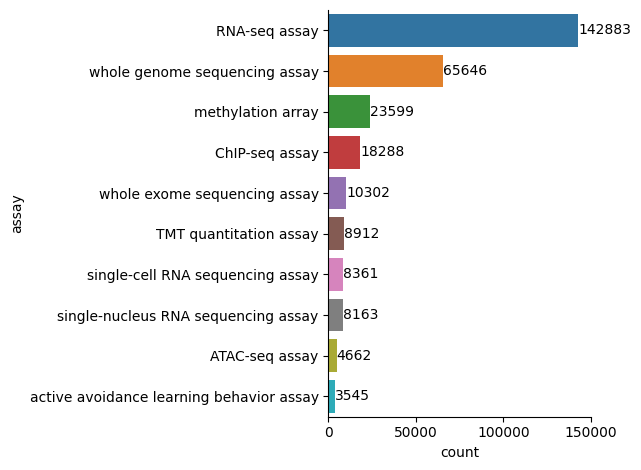

In [66]:
ax = sns.barplot(
    data = temp3.sort_values(by='count', ascending=False)[:10], 
    x = 'count',
    y =  'assay',
    hue = 'assay'
)

for container in ax.containers:
    ax.bar_label(container)

sns.despine()

plt.tight_layout()
# save the plot as JPG file
plt.savefig("./imgs/assay-counts.jpg")

In [11]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)


app.layout = html.Div([
    html.H4('file formats'),
    dcc.Dropdown(
        id="dropdown",
        options=list(temp['assay'].unique()),
        value="immunofluorescence",
        clearable=False,
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("dropdown", "value"))
    
def update_bar_chart(assay):
    # temp = px.data.tips()  # replace with your own data source
    mask = temp["assay"] == assay
    fig = px.bar(temp[mask], x="countLog", y="fileFormat",
                 color="assay", barmode="group")
    return fig


app.run_server(debug=True)